## Goal of notebook

This notebook accompanies [sSVN](https://github.com/leviyevalex/sSVN), and provides an example of how to run on the hybrid Rosenbrock. The hybrid Rosenbrock is a very convenient benchmark.
1. It is easily adapted to any number of dimensions $D \ge 2$.
2. Each marginal is a long and narrow ridge. These are notoriously difficult for sampling algorithms to resolve.
3. It may be analytically sampled, providing a computationally trivial way to compare the quality of samples obtained via various methods/algorithms.
4. Most importantly, it closely resembles many geometries often encountered in practice (e.g, https://arxiv.org/abs/2106.15163).

In this notebook we compare the performance of SVGD and sSVN on a ten-dimensional hybrid Rosenbrock. We encourage the reader to tinker with the settings of the hybrid Rosenbrock, `eps`, and `nParticles`. The reader will find that sSVN is much more stable than sSVGD. That is, sSVN may be evolved with a much larger `eps`.

## Import tools

In [1]:
import sys
sys.path.append("..")

from models.JAXHRD import hybrid_rosenbrock
from models.multivariate_gaussian import multivariate_gaussian
from src.samplers import samplers
from scripts.plot_helper_functions import collect_samples
import numpy as np
%matplotlib inline
import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
import corner
from jax import random
import jax.numpy as jnp


## Setup hybrid Rosenbrock model

In [2]:
# Hybrid Rosenbrock
n2 = 3
n1 = 4
DoF = n2 * (n1 - 1) + 1
B = np.zeros(DoF)
B[0] = 30
B[1:] = 20
mu=1
model = hybrid_rosenbrock(n2, n1, mu, B)
bounded_iid_samples = np.load('rosenbrock_iid_bounded_samples.npy')
# Load iid samples
# try:
#     bounded_iid_samples = np.load('rosenbrock_iid_bounded_samples.npy')
# except:
#     np.random.seed(2)
#     ground_truth_samples = model.newDrawFromPosterior(50000000)
#     truth_table = ((ground_truth_samples > model.lower_bound) & (ground_truth_samples < model.upper_bound))
#     idx = np.where(np.all(truth_table, axis=1))[0]
#     print('%i samples obtained from rejection sampling' % idx.shape[0])
#     bounded_iid_samples = ground_truth_samples[idx]

In [3]:
nParticles = 100
nIterations = 50
kernelKwargs = {'h':model.DoF / 10, 'p':1.} # Lp
sampler1 = samplers(model=model, nIterations=nIterations, nParticles=nParticles, profile=False, kernel_type='Lp')
sampler1.apply(method='reparam_sSVN', eps=1, kernelKwargs=kernelKwargs)

Stepsize 5.000000 | Median bandwidth: 0.029915:   0%|          | 0/50 [00:03<?, ?it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.028997:   6%|▌         | 3/50 [00:04<00:47,  1.02s/it]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent
Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.027756:   8%|▊         | 4/50 [00:04<00:32,  1.43it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.028785:  10%|█         | 5/50 [00:04<00:24,  1.85it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.029394:  12%|█▏        | 6/50 [00:05<00:18,  2.34it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.028791:  14%|█▍        | 7/50 [00:05<00:15,  2.75it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.030685:  16%|█▌        | 8/50 [00:05<00:14,  2.90it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.029042:  18%|█▊        | 9/50 [00:05<00:14,  2.90it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.028242:  18%|█▊        | 9/50 [00:06<00:14,  2.90it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.029052:  22%|██▏       | 11/50 [00:07<00:18,  2.07it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.028037:  22%|██▏       | 11/50 [00:07<00:18,  2.07it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.029227:  26%|██▌       | 13/50 [00:08<00:17,  2.10it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.030361:  28%|██▊       | 14/50 [00:08<00:15,  2.27it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.030729:  30%|███       | 15/50 [00:08<00:13,  2.66it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.027396:  32%|███▏      | 16/50 [00:08<00:11,  3.05it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.029024:  34%|███▍      | 17/50 [00:09<00:09,  3.41it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.029419:  36%|███▌      | 18/50 [00:09<00:08,  3.59it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.029195:  38%|███▊      | 19/50 [00:09<00:08,  3.73it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.029150:  40%|████      | 20/50 [00:09<00:07,  3.93it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.030867:  42%|████▏     | 21/50 [00:10<00:06,  4.15it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.030180:  44%|████▍     | 22/50 [00:10<00:06,  4.09it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 5.000000 | Median bandwidth: 0.031572:  46%|████▌     | 23/50 [00:10<00:06,  4.13it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.039492:  48%|████▊     | 24/50 [00:10<00:06,  3.95it/s]

Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.041434:  50%|█████     | 25/50 [00:11<00:07,  3.25it/s]

Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.043368:  52%|█████▏    | 26/50 [00:11<00:07,  3.38it/s]

Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.041999:  54%|█████▍    | 27/50 [00:11<00:06,  3.75it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.042333:  58%|█████▊    | 29/50 [00:12<00:04,  4.50it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.043048:  62%|██████▏   | 31/50 [00:12<00:03,  4.81it/s]

Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.040826:  64%|██████▍   | 32/50 [00:12<00:03,  4.75it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.041061:  68%|██████▊   | 34/50 [00:13<00:03,  5.28it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.042503:  72%|███████▏  | 36/50 [00:13<00:02,  5.26it/s]

Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.042894:  74%|███████▍  | 37/50 [00:13<00:03,  4.19it/s]

Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.041888:  76%|███████▌  | 38/50 [00:14<00:02,  4.04it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.041071:  80%|████████  | 40/50 [00:14<00:02,  4.50it/s]

Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.042875:  82%|████████▏ | 41/50 [00:14<00:02,  4.38it/s]

Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.040928:  84%|████████▍ | 42/50 [00:15<00:01,  4.39it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.042035:  88%|████████▊ | 44/50 [00:15<00:01,  4.93it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.042660:  92%|█████████▏| 46/50 [00:15<00:00,  4.88it/s]

Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.041331:  94%|█████████▍| 47/50 [00:15<00:00,  4.93it/s]

Halfing step size: Insufficient descent
Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.042219:  98%|█████████▊| 49/50 [00:16<00:00,  4.47it/s]

Halfing step size: Insufficient descent


Stepsize 10.000000 | Median bandwidth: 0.042327: 100%|██████████| 50/50 [00:16<00:00,  2.99it/s]

Halfing step size: Insufficient descent


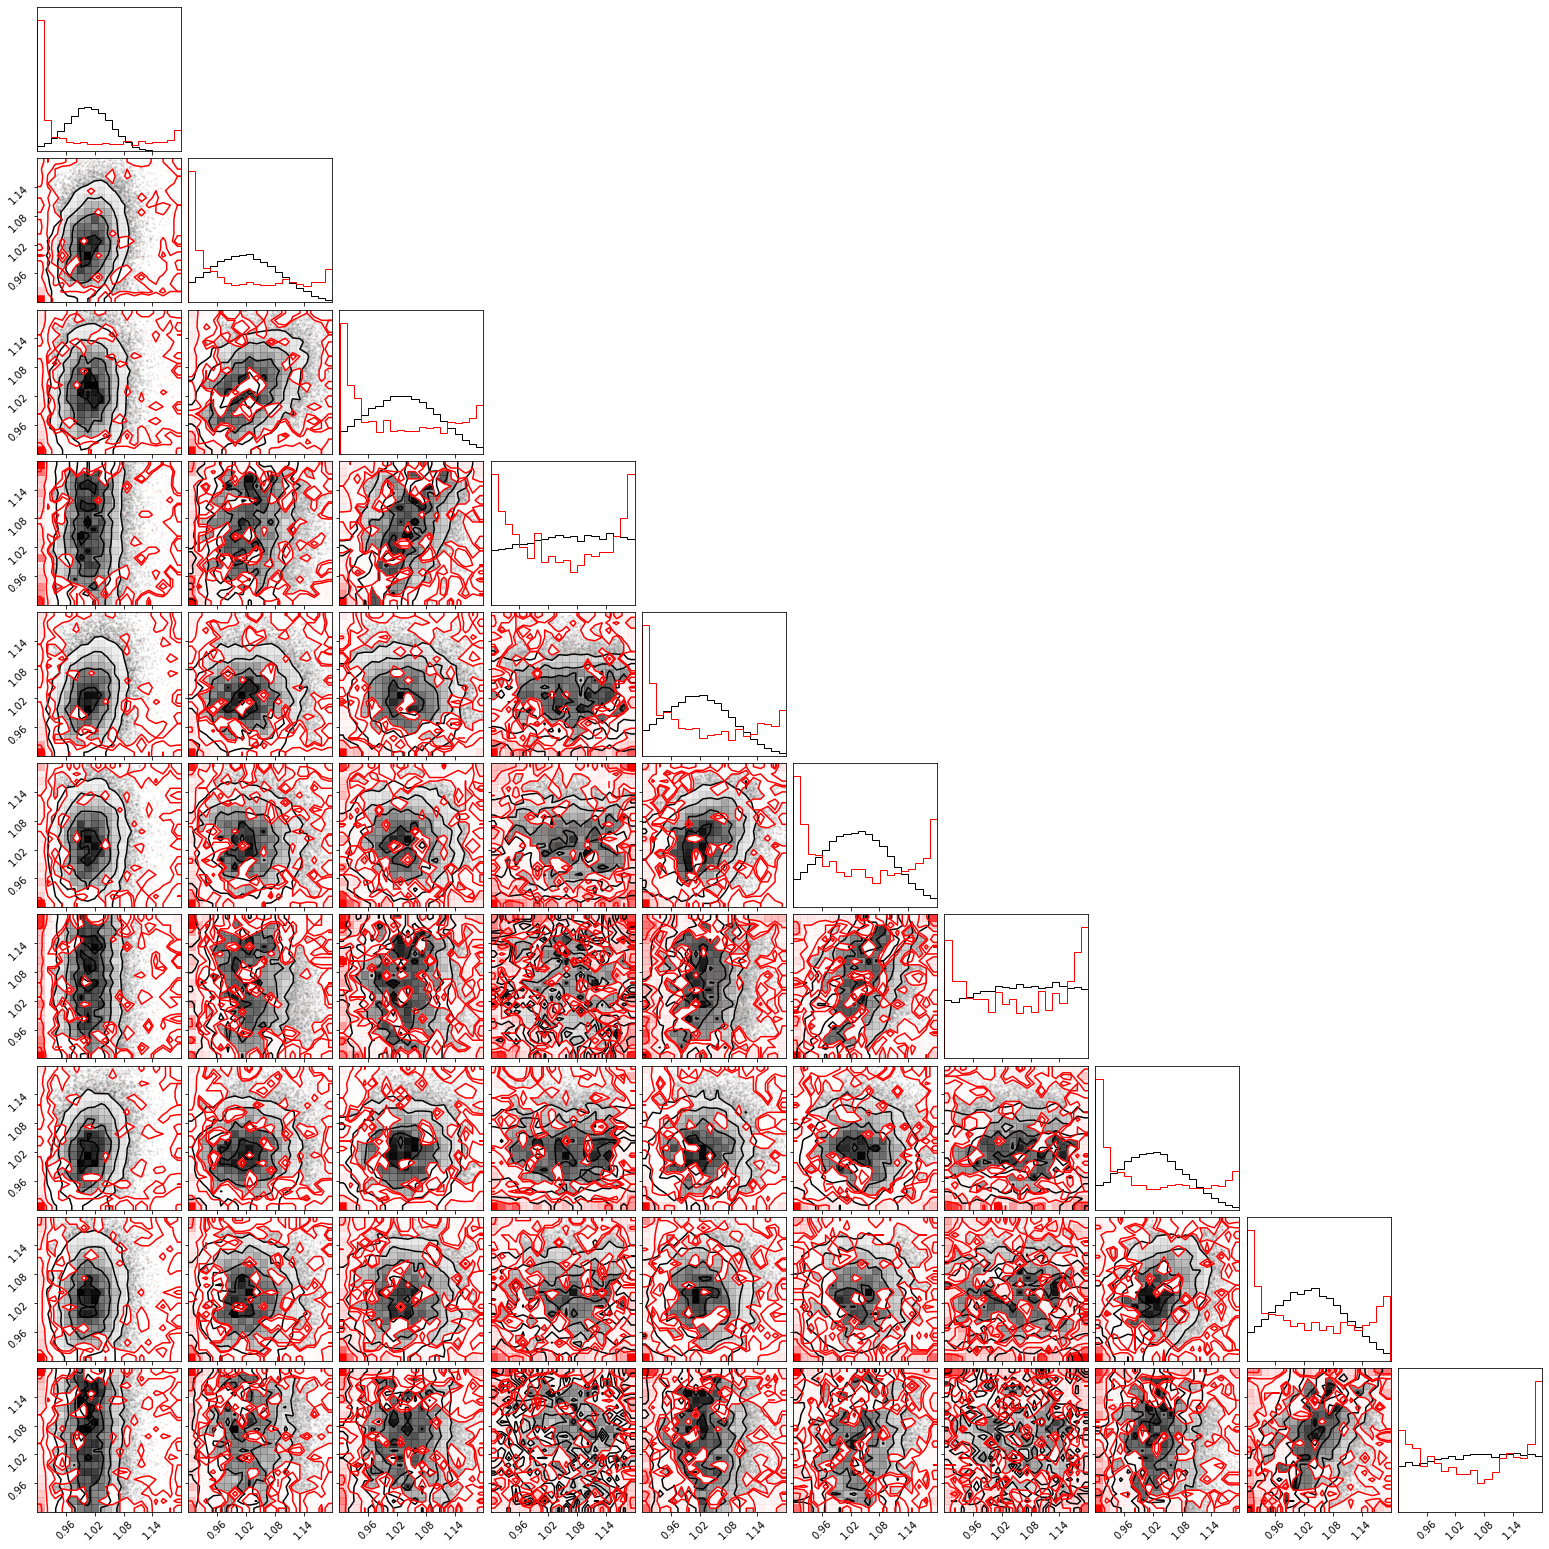

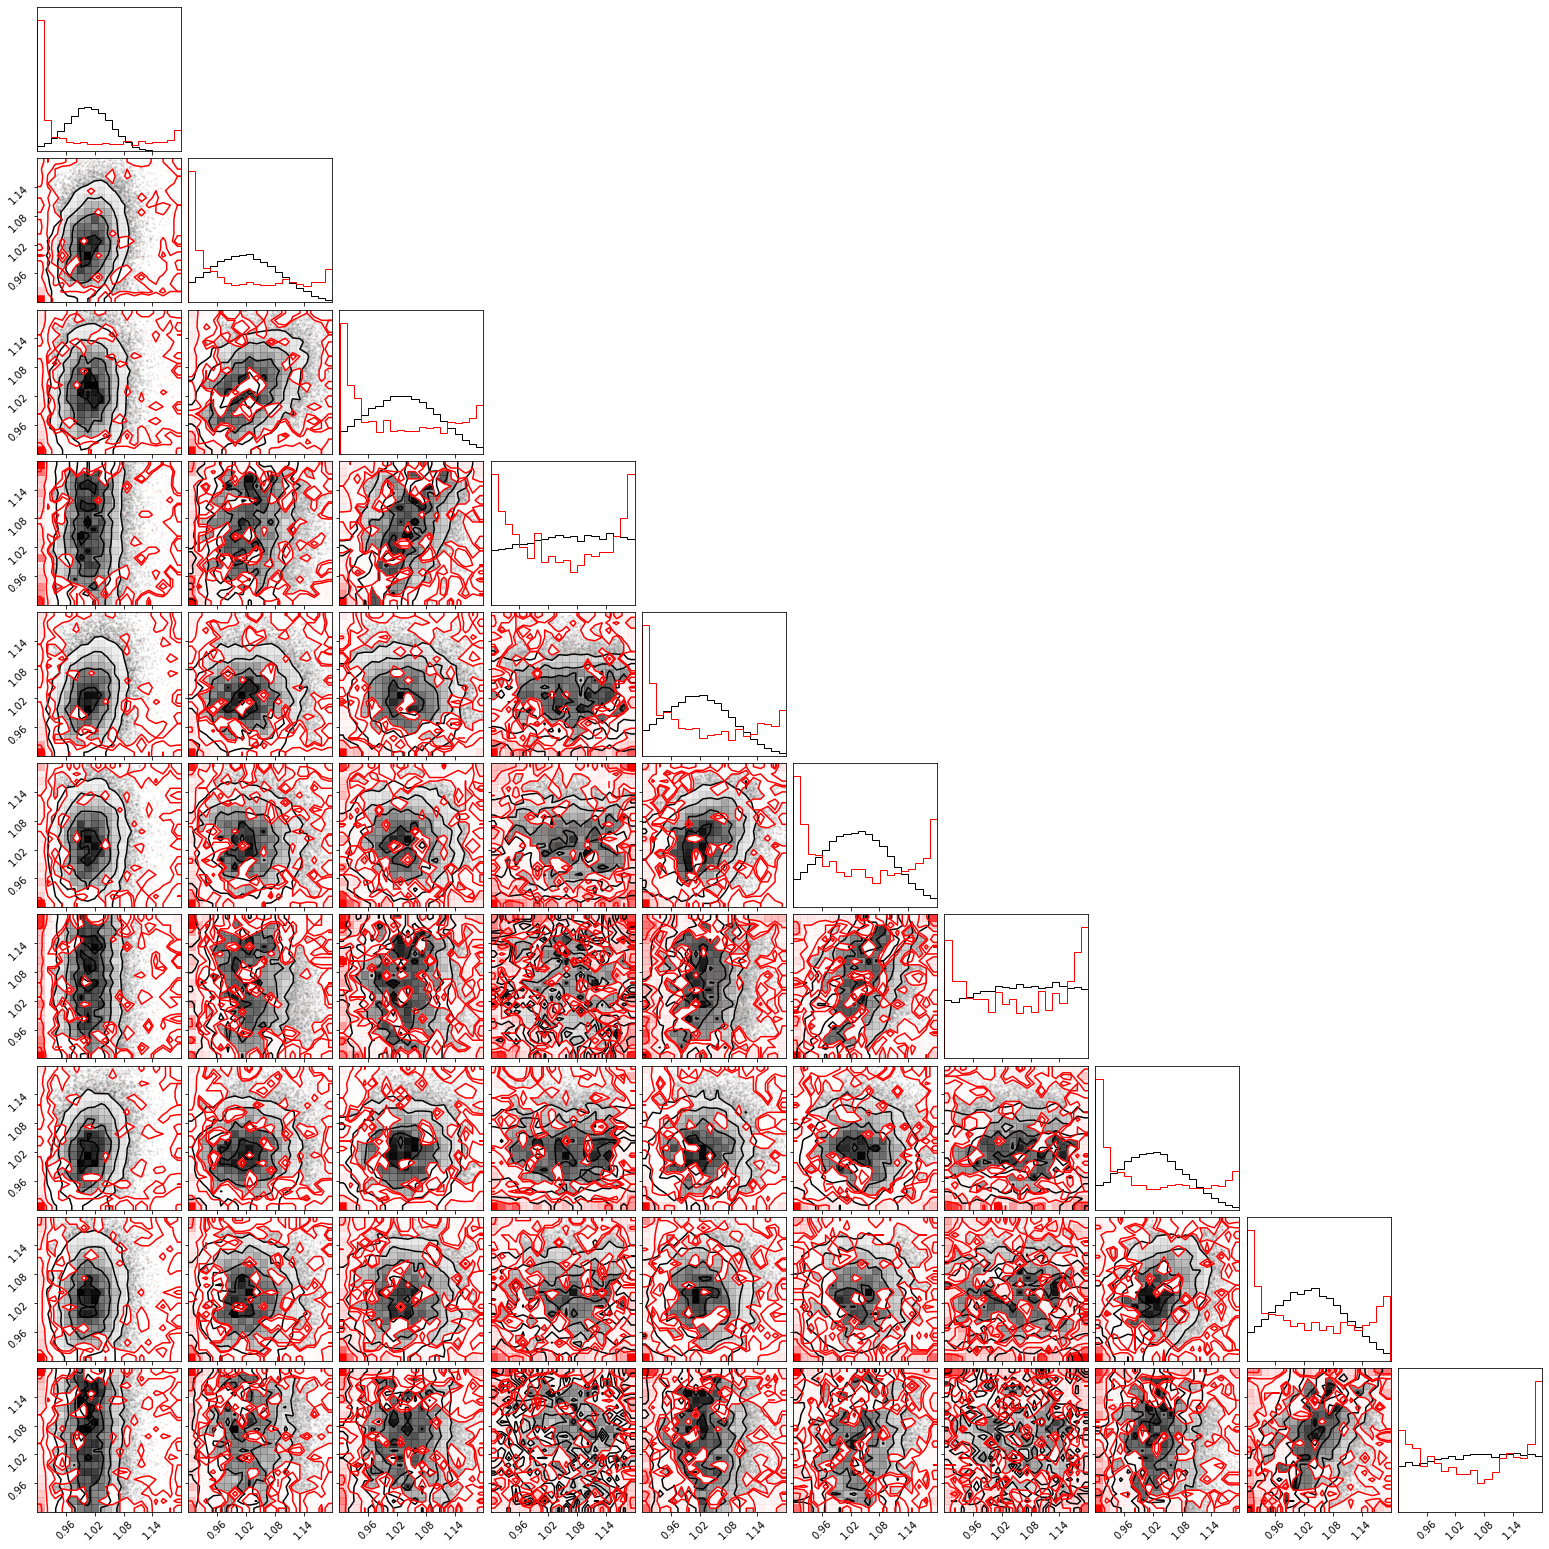

In [4]:
# %%capture
X1 = collect_samples(sampler1.history_path)
fig1 = corner.corner(bounded_iid_samples[0:30000], hist_kwargs={'density':True})
corner.corner(X1, color='r', fig=fig1, hist_kwargs={'density':True})

# Scratchwork

In [ ]:
v = np.array([5, 3, 2, -1])
np.all(v > 0)